<a href="https://colab.research.google.com/github/hudaor/leaf-disease-1/blob/main/Copie_de_InceptionV3_100_epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install pyyaml h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Inceptionv3
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

In [ ]:
#Parametres  
import keras
import tensorflow as tf
from tensorflow.keras.applications import VGG16
import sys
from tensorflow.keras import optimizers
from PIL import Image

#Using InceptionV3 Pre-trained Model
conv_base = InceptionV3(weights = 'imagenet',
              include_top = False,
              input_shape=(224, 224, 3))

conv_base.summary()

import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validation')
#test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

# Compile the model
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
model.save('/content/drive/MyDrive/2022dataset 05 2 22/inceptionv31.h5')

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/20
50/50 [==============================] - 3150s 64s/step - loss: 0.7747 - acc: 0.6540 - val_loss: 0.4173 - val_acc: 0.8161
Epoch 2/20
50/50 [==============================] - 615s 12s/step - loss: 0.5008 - acc: 0.7900 - val_loss: 0.5282 - val_acc: 0.7411
Epoch 3/20
50/50 [==============================] - 598s 12s/step - loss: 0.4820 - acc: 0.7834 - val_loss: 0.3213 - val_acc: 0.8639
Epoch 4/20
50/50 [==============================] - 612s 12s/step - loss: 0.3920 - acc: 0.8280 - val_loss: 0.2996 - val_acc: 0.8720
Epoch 5/20
50/50 [==============================] - 602s 12s/step - loss: 0.4036 - acc: 0.8310 - val_loss: 0.4039 - val_acc: 0.8236
Epoch 6/20
50/50 [==============================] - 590s 12s/step - loss: 0.3688 - acc: 0.8390 - val_loss: 0.2907 - val_acc: 0.8739
Epoch 7/20
50/50 [==============================] - 588s 12s/step - loss: 0.3201 - acc: 0.8800 - val_loss: 0.2877 - val_acc: 0.8769
Epoch 8/20
50/50 [==============================] - 595s 12s/step - loss: 0

In [ ]:
#model3.save('/content/drive/MyDrive/18 04 22/inception3.h5') 
np.save('/content/drive/MyDrive/2022dataset 05 2 22/historyv3', history) 

INFO:tensorflow:Assets written to: ram://0ac8c202-a45b-4d2c-97fc-2fd7ac910de2/assets


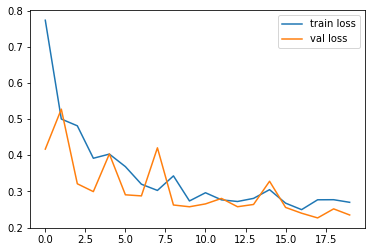

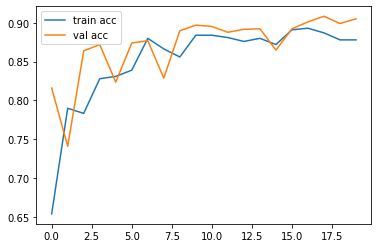

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

#read_r16 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyy.npy',allow_pickle='TRUE').item()
#r_total_loss = read_r1.history['loss'] + read_r.history['loss']
#r_total_val_loss = read_r1.history['val_loss'] + read_r.history['val_loss']

#r_total_accuracy = read_r1.history['accuracy'] + read_r.history['accuracy']
#r_total_val_accuracy = read_r1.history['val_accuracy'] + read_r.history['val_accuracy']

#print(read_r1.history['loss'])



# plot the loss
plt.plot(history.history['loss'],  label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_lossCNN')

# plot the accuracy
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_accCNN')

In [ ]:
!pip install pyyaml h5py
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Inceptionv3
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

In [ ]:
#Parametres  
import keras
import tensorflow as tf
from tensorflow.keras.applications import VGG16
import sys
from tensorflow.keras import optimizers
from PIL import Image

#Using InceptionV3 Pre-trained Model
conv_base = InceptionV3(weights = 'imagenet',
              include_top = False,
              input_shape=(224, 224, 3))

conv_base.summary()

import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/2022dataset 05 2 22'
train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validation')
#test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary')


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
modelv3 =load_model('/content/drive/MyDrive/2022dataset 05 2 22/inceptionv31.h5')


read_rv3 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyv3.npy',allow_pickle='TRUE').item()


# Compile the model
modelv3.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

# Train the model
historyv3 = modelv3.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=35,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Save the model
model.save('/content/drive/MyDrive/2022dataset 05 2 22/inceptionv32.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/35
50/50 [==============================] - 2177s 44s/step - loss: 0.3171 - acc: 0.8880 - val_loss: 0.2541 - val_acc: 0.8966
Epoch 2/35
50/50 [==============================] - 663s 13s/step - loss: 0.2585 - acc: 0.9000 - val_loss: 0.4176 - val_acc: 0.8329
Epoch 3/35
50/50 [==============================] - 651s 13s/step - loss: 0.2704 - acc: 0.9020 - val_loss: 0.3269 - val_acc: 0.8653
Epoch 4/35
50/50 [==============================] - 676s 14s/step - loss: 0.2423 - acc: 0.8900 - val_loss: 0.3221 - val_acc: 0.8637
Epoch 5/35
50/50 [==============================] - 680s 14s/step - loss: 0.2789 - acc: 0.8897 - val_loss: 0.2212 - val_acc: 0.9122
Epoch 6/35
50/50 [==============================] - 664s 13s/step - loss: 0.2013 - acc: 0.9200 - val_loss: 0.2840 - val_acc: 0.8867
Epoch 7/35
50/50 [==============================] - 667s 14s/step - loss: 0.2901 - acc: 0.8990 - val_loss: 0.2151 - val_acc: 0.9136
Epoch 8/35
50/50 [==============================] - 654s 13s/step - loss: 0

In [ ]:

np.save('/content/drive/MyDrive/2022dataset 05 2 22/historyv3', historyv3) 


INFO:tensorflow:Assets written to: ram://7d8d1908-a79a-495f-85e6-68d2b04d606c/assets


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
modelv3 =load_model('/content/drive/MyDrive/2022dataset 05 2 22/inceptionv32.h5')


read_rv3 = np.load('/content/drive/MyDrive/2022dataset 05 2 22/historyv3.npy',allow_pickle='TRUE').item()


# Compile the model
modelv3.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=2e-5),
metrics=['acc'])

# Train the model
historyv3 = modelv3.fit_generator(
    train_generator,
    steps_per_epoch=50,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/25
50/50 [==============================] - 649s 13s/step - loss: 0.7356 - acc: 0.6650 - val_loss: 0.5279 - val_acc: 0.7468
Epoch 2/25
50/50 [==============================] - 652s 13s/step - loss: 0.4705 - acc: 0.7850 - val_loss: 0.3910 - val_acc: 0.8156
Epoch 3/25
50/50 [==============================] - 628s 13s/step - loss: 0.4416 - acc: 0.8010 - val_loss: 0.3912 - val_acc: 0.8244
Epoch 4/25
50/50 [==============================] - 621s 13s/step - loss: 0.4065 - acc: 0.8200 - val_loss: 0.3767 - val_acc: 0.8203
Epoch 5/25
50/50 [==============================] - 621s 13s/step - loss: 0.3890 - acc: 0.8290 - val_loss: 0.3724 - val_acc: 0.8399
Epoch 6/25
50/50 [==============================] - 607s 12s/step - loss: 0.3332 - acc: 0.8630 - val_loss: 0.3084 - val_acc: 0.8746
Epoch 7/25
50/50 [==============================] - 598s 12s/step - loss: 0.3235 - acc: 0.8560 - val_loss: 0.2840 - val_acc: 0.8862
Epoch 8/25
50/50 [==============================] - 576s 12s/step - loss: 0.

In [ ]:
model.save('/content/drive/MyDrive/2022dataset 05 2 22/inceptionv33.h5')